# Unit6-7 HW

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import astropy
sns.set_style('darkgrid')
import scipy.stats as stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
n=10
chi2=3.841
d=arccos(sqrt(n2-(n2-R2)exp(chi2/n))/R)

(58.057954547500955, 91.94204545249904)

45.0314807044439

## HW-U6-1
#### (a) Compute the sample mean direction

In [3]:
theta=np.array([0,45,90,135,180,225])*astropy.units.deg
freq=np.array([2,4,3,1,1,1])
theta
freq
astropy.stats.circmean(theta,weights=freq)


AttributeError: module 'astropy' has no attribute 'units'

方向的均值是67.5$^\circ$

#### (b) Compute the angular deviation for the data

In [15]:
n=sum(freq)
Y=sum(freq*np.sin(theta))/n
X=sum(freq*np.cos(theta))/n
r=np.sqrt(X**2+Y**2)
r
1-r
2*(1-r)
np.log(1-r)

<Quantity 0.52572034>

<Quantity 0.47427966>

<Quantity 0.94855932>

<Quantity -0.74595813>

#### (c) Determine 95% confidence limits for the population mean

In [19]:
def meand_ci(r,n,alpha):
    R=r*n  
    chi2=stats.chi2.isf(alpha, 1, loc=0, scale=1)
    if r>=0.9:
        return np.arccos(np.sqrt(n**2-(n**2-R**2)*np.e**(chi2/n))/R)
    else:
        return np.arccos(np.sqrt(2*n*(2*R**2-n*chi2)/(4*n-chi2))/R)

In [31]:
data_mean=astropy.stats.circmean(theta,weights=freq)
ci=(data_mean-meand_ci(r,n,0.05),data_mean+meand_ci(r,n,0.05))
ci

12

(<Quantity 20.06103815 deg>, <Quantity 114.93896185 deg>)

均值的95%置信区间是(20.06$^\circ$,114.94$^\circ$)

#### (d) Determine the sample median direction

In [32]:
def sample_median(theta,freq):
    n=sum(freq)
    tmp=np.cumsum(freq)
    if n%2:
        for i in range(len(tmp)):
            if tmp[i]>=(n-1)/2:
                break
        return theta[i]
    else :
        for i in range(len(tmp)):
            if tmp[i]>=n/2-1:
                break
        left=i
        for i in range(len(tmp)):
            if tmp[i]>=n/2+1:
                break
        right=i
        return (theta[left]+theta[right])/2

In [33]:
sample_median(theta,freq)

<Quantity 67.5 deg>

## HW-U6-2
#### Visualize the data in Problem HW-6-1 in polar coodinates

<BarContainer object of 6 artists>

(0, 5)

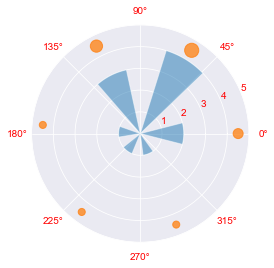

In [65]:
width=0.5
data=np.array([0,45,90,135,180,225])
ax = plt.subplot(111, projection='polar')
ax.bar(data, freq, width=width, bottom=0.0, alpha=0.5)
ax.scatter(data,4.5*np.ones(len(theta)),marker='o', s=50*freq,alpha=0.75)
ax.tick_params(colors='red')
ax.set_rlim(0,5)
plt.show()

## HW-U7-1
#### 如果在某一个地区covid-19的感染率在10%，从该地区人口中随机取样N个样本进行实验研究，要使得样本感染率误差在5%以内 （95% confidence level)，N至少应该要采样多少？

In [66]:
def qualitative_n(z,p,d):
    return z**2*p*(1-p)/d**2

In [67]:
qualitative_n(2,0.1,0.05)

144.0

N至少要采样144。

## HW-U7-2
#### 如果空腹血糖平均水平在90 mg/dl，初步实验表明某种饮料在半小时内会提高血糖 3 mg/dl；假设血糖的标准差在10 mg/dl； 研究同一批人喝饮料前后的血糖水平增加量，采用paired -t检验，要求NHST显著水平达到99%，统计Power达到0.9 ，估算需要多少大的样本量？

<img src="E:/Jupyter/BI148_HW/Unit67HW/7-2.png" style="zoom: 60%;" />

根据G-Power的计算结果可知，需要样本量为135